# Linear Regression

## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

# Expenditure on different media and their impact on sales

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# simple liner regression-- so we combine all columns as 'total spend'
# feature now is 'total spend'
# predict 'sales'

df['total_spend'] = df['TV']+df['radio']+df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

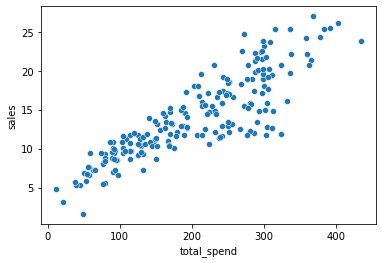

In [6]:
sns.scatterplot(data=df, x='total_spend', y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

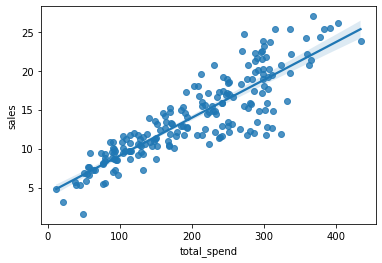

In [7]:
sns.regplot(data=df, x='total_spend', y='sales')

In [8]:
X = df['total_spend']
y = df['sales']

In [9]:
#help(np.polyfit)  put polyfit degree to 1 (linear)

In [10]:
# y = mx+b
# y = B1x + B0

np.polyfit(X,y,deg=1)   # returns [slope, intercept]

array([0.04868788, 4.24302822])

In [11]:
potential_spend = np.linspace(0,500,100)

In [12]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

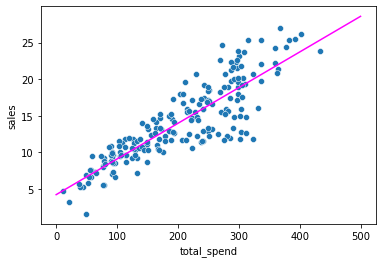

In [13]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(potential_spend, predicted_sales, color='magenta')

In [14]:
# How much sales at total spend = 250

spend = 250
predicted_sales = 0.04868788*spend + 4.24302822

predicted_sales

16.41499822

## Polynominal fit

In [15]:
### Polynominal fit
np.polyfit(X,y,3)    # y = B3x**3 + B2x**2 + B1x**1 +B0

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
pot_spend = np.linspace(0,500,100)

In [17]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend +  2.70495053e+00  

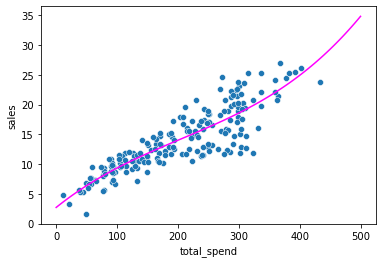

In [18]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(pot_spend, pred_sales, color='magenta')

**We need Performance test to which is better fit or to define goodness of fit.**

## *Using SciKit Learn*

$\color{red}{\text{! Important}}$   
Need to understand the theory and mathematics behind the algorithms.  
SciKit-Learn so easy to apply without truly understanding.  

Scikit-Learn is more about **applying models** and **performance metrics.**  
For more **deep statistical desriptions** use *statsmodels library* for say significance level, so on.

choose models  
apply it on train and test parts  
do performance metrics  

  


|   |   |
|---|---|
|X_Train| Y_Train |
| Y_test | Y_Test |

we will work with same advertising data

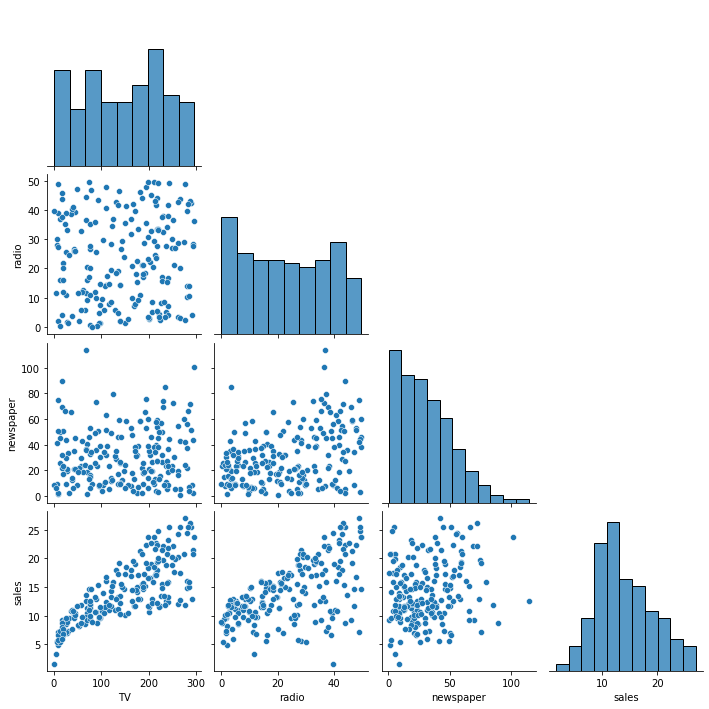

In [19]:
sns.pairplot(df.drop('total_spend', axis=1), corner=True)

In [20]:
# X vector  here data is already 
X = df.drop(['sales','total_spend'], axis=1)
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [21]:
# y vector
y = df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#help(train_test_split)

In [24]:
# tuple unpacking, order is important
# test_size generally taken as 20% or 30%.
# random_state is [choosing a set of indices], helpful to compare results across different models with same data set.
# it automatically shuffles the order and select the data. (to eliminate any ordering like ascending, which might be skewed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
len(df)

200

In [26]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [27]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [28]:
len(X_test)

60

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
#help(LinearRegression)

In [31]:
model = LinearRegression() #using default parameters

In [32]:
model.fit(X_train, y_train)   #use just train data to fit

LinearRegression()

In [33]:
test_predictions = model.predict(X_test)    #gives the predicted y for X_test data (best fit y data)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

# Performance Evaluation  

Now we have to find error between actual y and Predicted y.  
3 most common evaluation metrics for regression:
1. Mean Absolute Error  
## $\frac {1}{n} \sum_{i=1}^{n} |y_i - \hat y_i|$   
  
  
2. Mean Squared Error   
## $\frac {1}{n} \sum_{i=1}^{n} (y_i - \hat y_i)^2$   

Large errors are 'punished' more.  

3. Root Mean Square Error  

## $\sqrt{\frac {1}{n} \sum_{i=1}^{n} (y_i - \hat y_i)^2}$   

Large errors are represented well and units of variable is same.  


RMSE value should be compared to Average value, to know if it is acceptable. Also need domain knowledge to know how much of error is acceptable.     

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

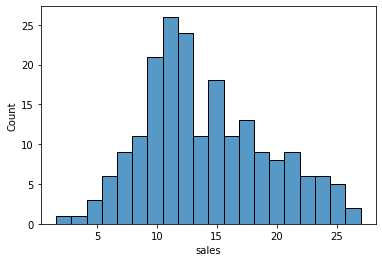

In [36]:
sns.histplot(data=df,x='sales', bins=20)

In [37]:
#MAE
mean_absolute_error(y_test, test_predictions)

1.2137457736144805

In [38]:
#MSE
mean_squared_error(y_test, test_predictions)

2.298716697886378

In [39]:
#RMSE
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993877

# Residual Plots

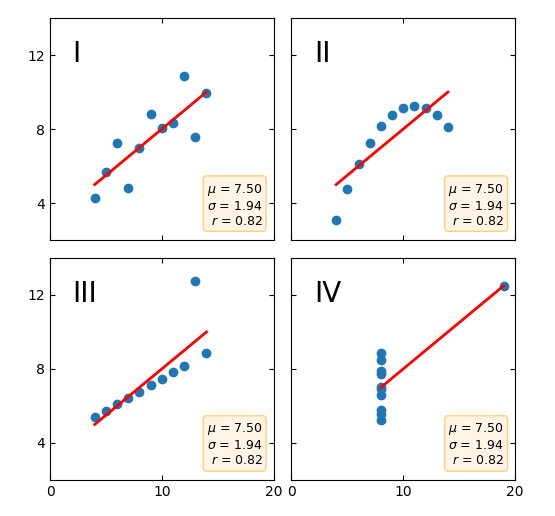

In [40]:
# Recall Anscombe Quartet
# Ref: https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

from IPython.display import Image
Image(filename = 'Anscombe_quartet.png')

Relying just on statistical data may not be correct.  
Linear Regression may not be suitable for all cases.  
Need to check:  
1. Density of residual errors ( as it is random, should be close to normal distribution. With mean around 0, as it is best fit)  
2. Residual (on y axis) vs actual y value (on x axis) -- should have almost same number of points distributed above and below y=0. y=0 means residual error is zero line.  

Checking only one of above will not reveal if Linear Regression model is correct model to use.  
Check both.  

In [41]:
test_residuals = y_test - test_predictions

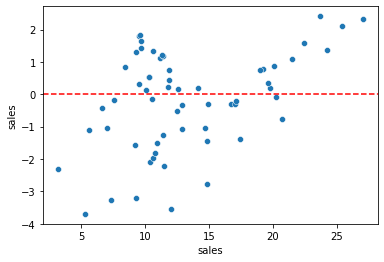

In [42]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

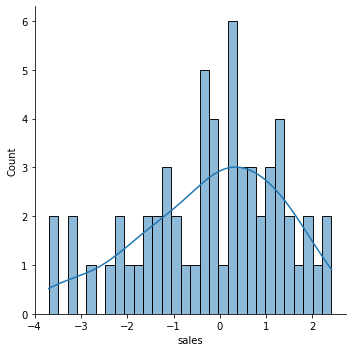

In [43]:
sns.displot(test_residuals,bins=30,kde=True)

Comparing if the distribution is normal or not.  
Probability plot

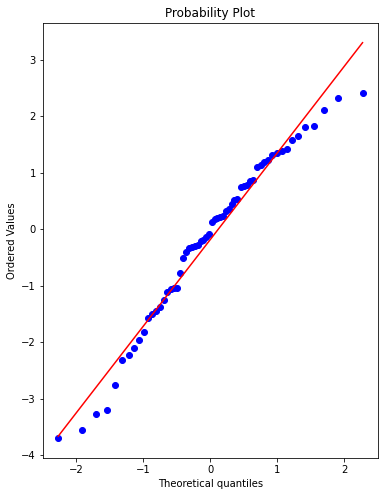

In [44]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8))
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

Here, model is good. So we don't adjust the to get better fit, which is required in real world problems.  
We'er satisfied with the performance metrics on test fit.

In [45]:
final_model = LinearRegression()

In [46]:
# we use entire data to fit
final_model.fit(X,y)

LinearRegression()

In [47]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

Coefficients are in same order as feature data order ( X ).  
**Interpretation of coeffs:**  
1. TV has .045 as coeff, i.e investing in TV Ads increases sales.  
    If we say TV (\\$), sales (units) as units. 1000\\$ in TV can incease 45 units of sales, keeping others constant.  
      
          
           
2. radio has .188 as coeff, i.e investing in radio increases sales the highest comapred to other media.  
    If we say radio (\\$), sales (units) as units. 1000\\$ in radio can incease 188 units of sales, keeping others constant.    
        
           
3. newspaper has -.001 as coeff, i.e investing in newspaper has neglible effect or infact decreases sales.  
    If we say newspaper (\\$), sales (units) as units. 1000\\$ in newspaper can decrease 1 units of sales, keeping others constant.  
    
      
      
In real world, we have budget constraints. Can have Upper limits for each media.  
This can involve operations research expertise.

In [49]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [50]:
y_hat = final_model.predict(X)

## $\sum_{i=0}^{n}{\beta_i*X_i}$   
n is no.of features (dimensions-1)  
$\beta_i$ is a coefficient of corresponding $X_i$  
$X_i$ is a feature.  
$X_0$ is just 1. $\implies$ first term is $\beta_0$ is just like a constant/intercept.  
  
    
      
 *The example we're dealing with, intercept/constant term is not considered.*  

To compare the $\hat y$,   
 Since this is a 4 dimensional plot, we use pairwise plot of [y_hat, actual y] vs $X_i$  

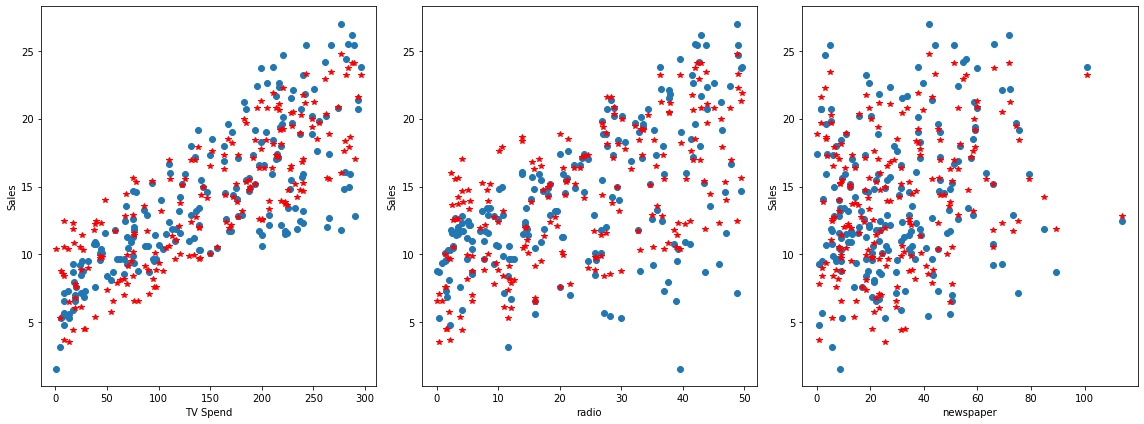

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'*', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'*', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('radio')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'*', color='red')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('newspaper')

plt.tight_layout();

#red color stars are y_hat
# blue color circles are actual y.

## Saving and loading a model

In [61]:
from joblib import dump,load

In [62]:
dump(final_model,'final_sales_model.joblib')  #this model saved as 'name.joblib' in computer and can shared.

['final_sales_model.joblib']

In [63]:
# After your colleague receives the model, they can implement the model by loading
loaded_model = load('final_sales_model.joblib') 

In [66]:
# After loading, they can call. You get exact same coeffs.
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [68]:
X.shape

(200, 3)

Let's say in a campaign we spend, 145 on TV, 32 on radio, 40 on newspaper.  
What are my sales units?

In [69]:
campaign=[[145,32,40]]

In [70]:
loaded_model.predict(campaignaign)

array([15.56622378])

## Conclusion  
**Basics Steps**  
1. Reading a dataset
2. Know dimensions
3. Clean the data, preprocessing
4. What model to apply?
5. Split train, test
6. Apply model
7. Performance metrics
8. If not satisfied, adjust the model
9. save the model
10. share the model
11. load the model
12. Do predictions.  